<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/C1Spread1_Prophet_Outlier_on_state_2023_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install prophet

In [31]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

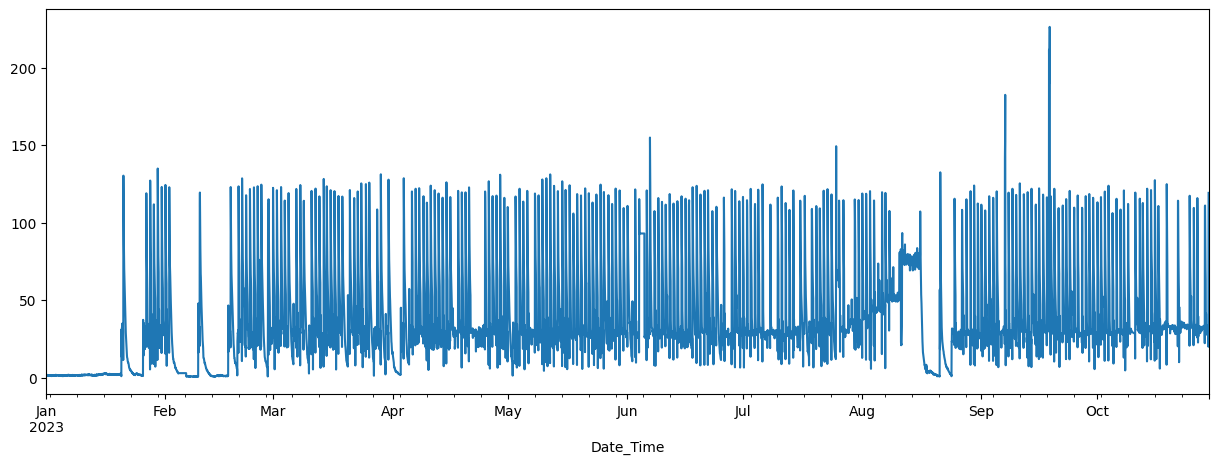

In [32]:
df = pd.read_csv('2023_one hours_1.csv', index_col='Date_Time', parse_dates=True)
df["Combust Monitor Actual Spread 1"].plot(figsize=(15, 5));

In [33]:
df_p = df[df['GT Gross MW'] > 190][['Combust Monitor Actual Spread 1']].copy()
df_p['Date_Time'] = df_p.index

In [34]:
df_p.head()

,Combust Monitor Actual Spread 1,Date_Time
Date_Time,,
2023-01-20 17:00:00,32.684,2023-01-20 17:00:00
2023-01-20 18:00:00,32.458,2023-01-20 18:00:00
2023-01-20 19:00:00,34.742,2023-01-20 19:00:00
2023-01-20 20:00:00,35.122,2023-01-20 20:00:00
2023-01-20 21:00:00,19.609,2023-01-20 21:00:00


In [35]:
df_p.columns = ['y', 'ds']
df_p.head()

,y,ds
Date_Time,,
2023-01-20 17:00:00,32.684,2023-01-20 17:00:00
2023-01-20 18:00:00,32.458,2023-01-20 18:00:00
2023-01-20 19:00:00,34.742,2023-01-20 19:00:00
2023-01-20 20:00:00,35.122,2023-01-20 20:00:00
2023-01-20 21:00:00,19.609,2023-01-20 21:00:00


In [36]:
logdf = df_p.copy()
logdf['y'] = np.log(logdf['y'])
logdf.head()

,y,ds
Date_Time,,
2023-01-20 17:00:00,3.486886,2023-01-20 17:00:00
2023-01-20 18:00:00,3.479947,2023-01-20 18:00:00
2023-01-20 19:00:00,3.547949,2023-01-20 19:00:00
2023-01-20 20:00:00,3.558828,2023-01-20 20:00:00
2023-01-20 21:00:00,2.975989,2023-01-20 21:00:00


In [37]:
split_date = '2023-09-15'
train = logdf.loc[logdf.index <= split_date].copy()
test = logdf.loc[logdf.index > split_date].copy()

In [38]:
m3 = Prophet()

In [39]:
m3.fit(logdf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wddf6jq/x912es_d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wddf6jq/vuujyzw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58508', 'data', 'file=/tmp/tmp7wddf6jq/x912es_d.json', 'init=/tmp/tmp7wddf6jq/vuujyzw_.json', 'output', 'file=/tmp/tmp7wddf6jq/prophet_modelal81w4d0/prophet_model-20231102152518.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:25:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:25:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [40]:
future = m3.make_future_dataframe(periods=300, freq = 'H')

In [41]:
forecast = m3.predict(future)

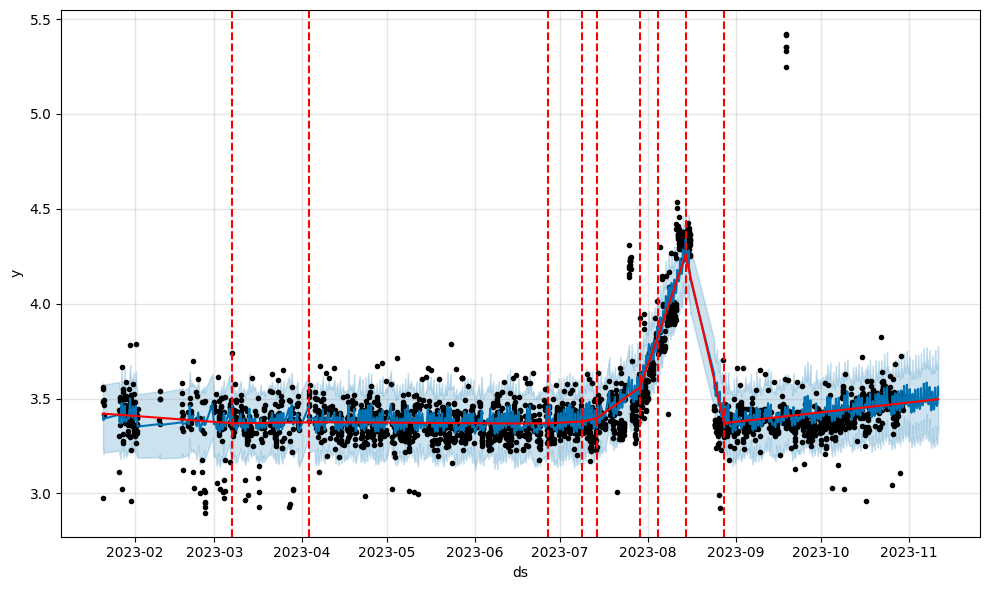

In [42]:
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

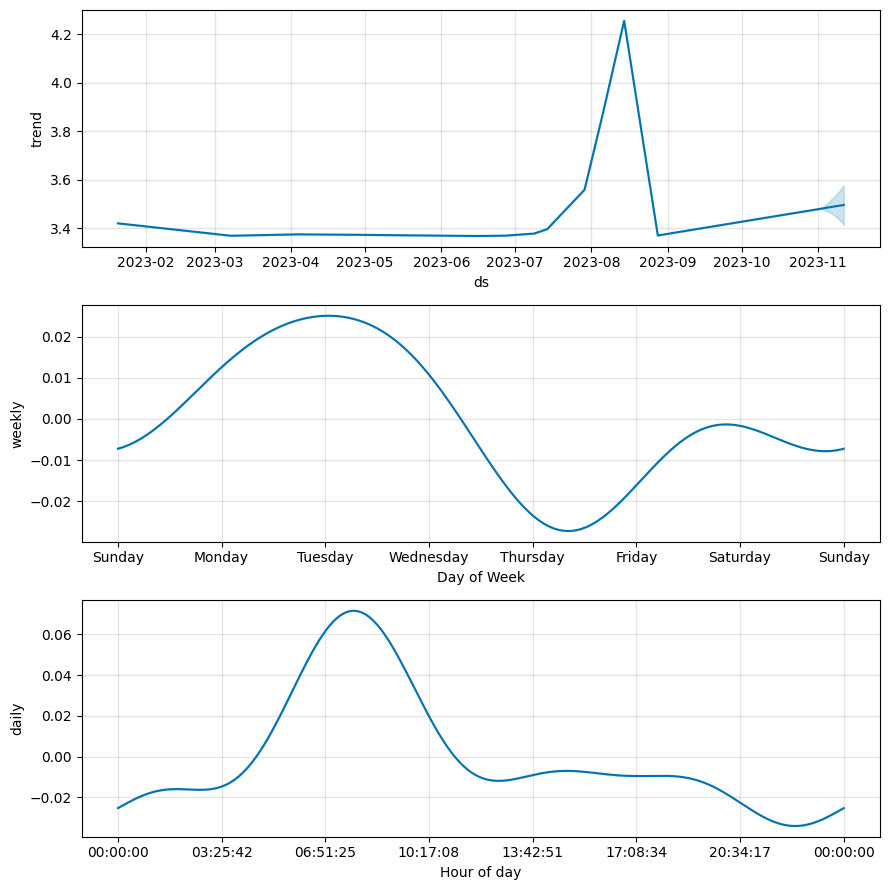

In [43]:
m3.plot_components(forecast);

In [44]:
from prophet.diagnostics import cross_validation

In [45]:
df_cv = cross_validation(
    m3,
    initial='300 hours',
    period='12 hours',
    horizon='24 hours')

INFO:prophet:Making 457 forecasts with cutoffs between 2023-02-08 20:00:00 and 2023-10-28 22:00:00


  0%|          | 0/457 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wddf6jq/svvx1m2o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wddf6jq/z7wq7fol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9784', 'data', 'file=/tmp/tmp7wddf6jq/svvx1m2o.json', 'init=/tmp/tmp7wddf6jq/z7wq7fol.json', 'output', 'file=/tmp/tmp7wddf6jq/prophet_modelror16_2d/prophet_model-20231102152524.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:25:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:25:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wddf6jq/6zi8sv3b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wddf6jq/3hp3r200.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [46]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-02-09 16:00:00,3.340778,3.207501,3.470971,3.387909,2023-02-08 20:00:00
1,2023-02-09 17:00:00,3.381583,3.236992,3.514877,3.540002,2023-02-08 20:00:00
2,2023-02-09 18:00:00,3.421921,3.294003,3.560280,3.365916,2023-02-08 20:00:00
3,2023-02-09 19:00:00,3.407911,3.269334,3.547125,3.495477,2023-02-08 20:00:00
4,2023-02-09 20:00:00,3.351442,3.218334,3.482006,3.495416,2023-02-08 20:00:00
...,...,...,...,...,...,...
5937,2023-10-29 18:00:00,3.468045,3.293097,3.635849,3.526978,2023-10-28 22:00:00
5938,2023-10-29 19:00:00,3.467414,3.286047,3.643770,3.493321,2023-10-28 22:00:00
5939,2023-10-29 20:00:00,3.462126,3.282632,3.621944,3.515389,2023-10-28 22:00:00
5940,2023-10-29 21:00:00,3.453928,3.269557,3.628044,3.498596,2023-10-28 22:00:00


In [47]:
from prophet.diagnostics import performance_metrics

In [48]:
pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 03:00:00,0.049778,0.223109,0.124691,0.035584,0.022834,0.035081,0.828462
1,0 days 04:00:00,0.058840,0.242569,0.130902,0.037016,0.021753,0.036650,0.821691
2,0 days 05:00:00,0.063244,0.251483,0.131680,0.036834,0.021947,0.036705,0.829997
3,0 days 06:00:00,0.063115,0.251228,0.129060,0.035977,0.021363,0.035908,0.835711
4,0 days 07:00:00,0.059714,0.244365,0.121442,0.033545,0.020017,0.033730,0.848301
5,0 days 08:00:00,0.060162,0.245279,0.122387,0.033828,0.018841,0.033993,0.828630
6,0 days 09:00:00,0.054261,0.232941,0.125523,0.035360,0.020695,0.035077,0.802717
7,0 days 10:00:00,0.045559,0.213445,0.126470,0.036197,0.022626,0.035569,0.784346
8,0 days 11:00:00,0.044444,0.210818,0.126212,0.036249,0.022439,0.035541,0.789929
9,0 days 12:00:00,0.048244,0.219645,0.129372,0.037268,0.022474,0.036423,0.789025


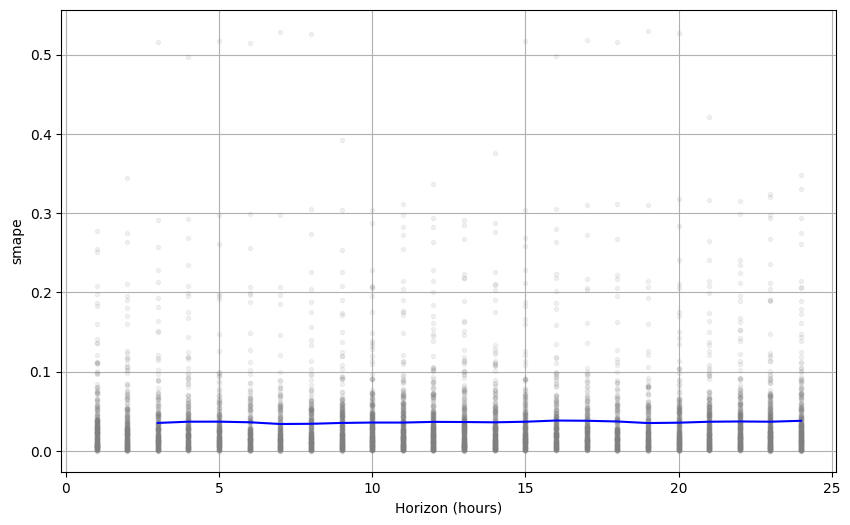

In [49]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape');

In [50]:
pm['smape'].mean()

0.03611386082020607

In [51]:
forecast['fact'] = logdf['y'].reset_index(drop = True)

In [52]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [53]:
df_cv.head(30)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-02-09 16:00:00,3.340778,3.207501,3.470971,3.387909,2023-02-08 20:00:00
1,2023-02-09 17:00:00,3.381583,3.236992,3.514877,3.540002,2023-02-08 20:00:00
2,2023-02-09 18:00:00,3.421921,3.294003,3.560280,3.365916,2023-02-08 20:00:00
3,2023-02-09 19:00:00,3.407911,3.269334,3.547125,3.495477,2023-02-08 20:00:00
4,2023-02-09 20:00:00,3.351442,3.218334,3.482006,3.495416,2023-02-08 20:00:00
5,2023-02-17 13:00:00,3.413800,3.286289,3.552225,3.470661,2023-02-16 21:00:00
6,2023-02-17 14:00:00,3.428800,3.289432,3.559040,3.581350,2023-02-16 21:00:00
7,2023-02-17 15:00:00,3.409267,3.274606,3.547837,3.527713,2023-02-16 21:00:00
8,2023-02-17 16:00:00,3.407970,3.277315,3.539723,3.428553,2023-02-16 21:00:00
9,2023-02-17 17:00:00,3.447786,3.313091,3.592070,3.397557,2023-02-16 21:00:00
